# Setup & Imports

This cell sets up the Python environment and imports all Swarm Intelligence algorithms for parameter sensitivity testing on discrete problems.

- Adds the parent directory to Python path
- Imports essential libraries: numpy, matplotlib, time
- Configures matplotlib for inline display
- Imports all Swarm Intelligence algorithms (PSO, ABC, FA, CS, ACO) discrete versions and Knapsack problem


In [1]:
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# Configure matplotlib for inline display in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# Import all Swarm Intelligence algorithms (discrete versions)
from algorithms import pso, abc, fa, cs, aco
from problems.knapsack import generate_knapsack_data, knapsack_fitness

print("✓ Imports successful!")
print(f"✓ Module path added: {module_path}")
print("✓ All Swarm Intelligence algorithms imported (PSO, ABC, FA, CS, ACO) - Discrete versions")


✓ Imports successful!
✓ Module path added: /mnt/d/02_University_HCMUS/Year_3/Sem_5/04_Intro2AI/algorithm
✓ All Swarm Intelligence algorithms imported (PSO, ABC, FA, CS, ACO) - Discrete versions


# Common Parameters

Define common parameters used for all algorithms in parameter sensitivity testing.

- N_ITEMS: Number of items in the Knapsack problem
- N_RUNS: Number of runs for statistical reliability
- POP_SIZE: Population size
- MAX_ITER: Maximum number of iterations


In [2]:
# Common parameters for all algorithms
N_ITEMS = 20  # Number of items in Knapsack problem
N_RUNS = 5  # Number of runs (set to 1 for fastest testing, higher for more reliable results)
POP_SIZE = 50  # Population size
MAX_ITER = 50  # Maximum number of iterations

# Generate Knapsack problem instance
weights, values, capacity, _ = generate_knapsack_data(N_ITEMS, seed=42)
context = {
    'weights': weights,
    'values': values,
    'capacity': capacity
}

print("=" * 60)
print("COMMON PARAMETERS")
print("=" * 60)
print(f"Number of items: {N_ITEMS}")
print(f"Number of runs: {N_RUNS}")
print(f"Population size: {POP_SIZE}")
print(f"Max iterations: {MAX_ITER}")
print(f"Knapsack capacity: {capacity}")
print(f"Total weight: {np.sum(weights)}, Total value: {np.sum(values)}")
print("=" * 60)


COMMON PARAMETERS
Number of items: 20
Number of runs: 5
Population size: 50
Max iterations: 50
Knapsack capacity: 71
Total weight: 178, Total value: 1103


# Algorithm Configurations

Define parameter configurations for each Swarm Intelligence algorithm (discrete versions).

**Instructions:**
1. Uncomment the section for the algorithm you want to test
2. Comment out all other algorithm sections
3. Each config contains algorithm-specific parameters and a descriptive label
4. Run the next cell to execute parameter sensitivity tests

**Available algorithms:**
- PSO: Parameters w, c1, c2
- ABC: Parameter limit
- FA: Parameters alpha, beta0, gamma
- CS: Parameters pa, beta
- ACO: Parameters alpha, beta, rho, Q


In [3]:
# ============================================================================
# ALGORITHM CONFIGURATIONS (DISCRETE VERSIONS)
# ============================================================================
# Uncomment ONE section below to test that algorithm's parameter sensitivity
# Comment out all other sections
# ============================================================================

# ===== PSO PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test PSO (discrete)

# CONFIGS = [
#     {'w': 0.5, 'c1': 1.5, 'c2': 1.5, 'label': 'PSO: w=0.5, c1=1.5, c2=1.5'},
#     {'w': 0.7, 'c1': 2.0, 'c2': 2.0, 'label': 'PSO: w=0.7, c1=2.0, c2=2.0'},
#     {'w': 0.8, 'c1': 2.0, 'c2': 2.0, 'label': 'PSO: w=0.8, c1=2.0, c2=2.0'},
#     {'w': 0.9, 'c1': 2.5, 'c2': 2.5, 'label': 'PSO: w=0.9, c1=2.5, c2=2.5'},
#     {'w': 1.0, 'c1': 2.0, 'c2': 2.0, 'label': 'PSO: w=1.0, c1=2.0, c2=2.0'},
#     {'w': 0.8, 'c1': 1.5, 'c2': 2.5, 'label': 'PSO: w=0.8, c1=1.5, c2=2.5'},
#     {'w': 0.8, 'c1': 2.5, 'c2': 1.5, 'label': 'PSO: w=0.8, c1=2.5, c2=1.5'},
# ]
# ALGORITHM_FUNC = pso.pso_discrete
# ALGORITHM_NAME = 'PSO'

# ===== ABC PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test ABC (discrete)

CONFIGS = [
    {'limit': 5, 'label': 'ABC: limit=5'},
    {'limit': 10, 'label': 'ABC: limit=10'},
    {'limit': 20, 'label': 'ABC: limit=20'},
    {'limit': 50, 'label': 'ABC: limit=50'},
    {'limit': 100, 'label': 'ABC: limit=100'},
]
ALGORITHM_FUNC = abc.abc_discrete
ALGORITHM_NAME = 'ABC'

# ===== FA PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test FA (discrete)

# CONFIGS = [
#     {'alpha': 0.2, 'beta0': 1.0, 'gamma': 0.95, 'label': 'FA: α=0.2, β₀=1.0, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 1.0, 'gamma': 0.95, 'label': 'FA: α=0.5, β₀=1.0, γ=0.95'},
#     {'alpha': 0.8, 'beta0': 1.0, 'gamma': 0.95, 'label': 'FA: α=0.8, β₀=1.0, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 0.5, 'gamma': 0.95, 'label': 'FA: α=0.5, β₀=0.5, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 2.0, 'gamma': 0.95, 'label': 'FA: α=0.5, β₀=2.0, γ=0.95'},
#     {'alpha': 0.5, 'beta0': 1.0, 'gamma': 0.5, 'label': 'FA: α=0.5, β₀=1.0, γ=0.5'},
#     {'alpha': 0.5, 'beta0': 1.0, 'gamma': 1.5, 'label': 'FA: α=0.5, β₀=1.0, γ=1.5'},
# ]
# ALGORITHM_FUNC = fa.firefly_discrete
# ALGORITHM_NAME = 'FA'

# ===== CS PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test CS (discrete)

# CONFIGS = [
#     {'pa': 0.1, 'beta': 1.0, 'label': 'CS: pa=0.1, β=1.0'},
#     {'pa': 0.25, 'beta': 1.5, 'label': 'CS: pa=0.25, β=1.5'},
#     {'pa': 0.5, 'beta': 1.5, 'label': 'CS: pa=0.5, β=1.5'},
#     {'pa': 0.25, 'beta': 1.0, 'label': 'CS: pa=0.25, β=1.0'},
#     {'pa': 0.25, 'beta': 2.0, 'label': 'CS: pa=0.25, β=2.0'},
# ]
# ALGORITHM_FUNC = cs.cuckoo_search_discrete
# ALGORITHM_NAME = 'CS'

# ===== ACO PARAMETER SENSITIVITY TEST =====
# Uncomment the section below to test ACO (discrete version)

# CONFIGS = [
#     {'alpha': 0.5, 'beta': 1.0, 'rho': 0.3, 'Q': 1.0, 'label': 'ACO: α=0.5, β=1.0, ρ=0.3, Q=1.0'},
#     {'alpha': 1.0, 'beta': 2.0, 'rho': 0.5, 'Q': 1.0, 'label': 'ACO: α=1.0, β=2.0, ρ=0.5, Q=1.0'},
#     {'alpha': 1.5, 'beta': 2.0, 'rho': 0.5, 'Q': 1.0, 'label': 'ACO: α=1.5, β=2.0, ρ=0.5, Q=1.0'},
#     {'alpha': 1.0, 'beta': 1.0, 'rho': 0.5, 'Q': 1.0, 'label': 'ACO: α=1.0, β=1.0, ρ=0.5, Q=1.0'},
#     {'alpha': 1.0, 'beta': 3.0, 'rho': 0.5, 'Q': 1.0, 'label': 'ACO: α=1.0, β=3.0, ρ=0.5, Q=1.0'},
#     {'alpha': 1.0, 'beta': 2.0, 'rho': 0.3, 'Q': 1.0, 'label': 'ACO: α=1.0, β=2.0, ρ=0.3, Q=1.0'},
#     {'alpha': 1.0, 'beta': 2.0, 'rho': 0.7, 'Q': 1.0, 'label': 'ACO: α=1.0, β=2.0, ρ=0.7, Q=1.0'},
#     {'alpha': 1.0, 'beta': 2.0, 'rho': 0.5, 'Q': 5.0, 'label': 'ACO: α=1.0, β=2.0, ρ=0.5, Q=5.0'},
# ]
# ALGORITHM_FUNC = aco.aco_discrete
# ALGORITHM_NAME = 'ACO'

# ============================================================================
# IMPORTANT: Make sure to uncomment ONE algorithm section above
# and define CONFIGS and ALGORITHM_FUNC variables
# ============================================================================

# Check if configuration is set
try:
    CONFIGS
    ALGORITHM_FUNC
    ALGORITHM_NAME
    print(f"✓ Configuration loaded: {ALGORITHM_NAME}")
    print(f"✓ Number of configs: {len(CONFIGS)}")
except NameError:
    print("⚠ WARNING: No algorithm configuration selected!")
    print("Please uncomment ONE algorithm section above and run this cell again.")


✓ Configuration loaded: ABC
✓ Number of configs: 5


# Run Parameter Sensitivity Tests

Execute parameter sensitivity tests for all configurations on the Knapsack problem.

- Runs each configuration N_RUNS times for statistical reliability
- Computes average convergence history for each configuration
- Stores results in memory for visualization
- Special handling for ACO which has different function signature


In [4]:
# Run parameter sensitivity tests
all_histories = {}  # Dictionary to store average convergence for each config

print("=" * 60)
print(f"PARAMETER SENSITIVITY TEST: {ALGORITHM_NAME} (Discrete)")
print("=" * 60)
print(f"Testing {len(CONFIGS)} configurations")
print(f"Each config will run {N_RUNS} times")
print("=" * 60)

for config_idx, config in enumerate(CONFIGS, 1):
    config_label = config['label']
    print(f"\n[{config_idx}/{len(CONFIGS)}] Testing: {config_label}")
    
    # Extract parameters (exclude 'label' key)
    params = {k: v for k, v in config.items() if k != 'label'}
    
    # Run N_RUNS times
    config_histories = []
    for run in range(N_RUNS):
        print(f"  Run {run+1}/{N_RUNS}...", end=" ")
        start_time = time.time()
        
        # Special handling for ACO (different function signature)
        if ALGORITHM_NAME == 'ACO':
            sol, fit, hist = ALGORITHM_FUNC(
                knapsack_fitness, context, POP_SIZE, MAX_ITER, **params
            )
        else:
            # All other algorithms (PSO, ABC, FA, CS) use _discrete functions
            sol, fit, hist = ALGORITHM_FUNC(
                knapsack_fitness, context, N_ITEMS, POP_SIZE, MAX_ITER, **params
            )
        
        elapsed = time.time() - start_time
        config_histories.append(hist)
        print(f"Fitness: {fit:.2f} ({elapsed:.2f}s)")
    
    # Calculate average convergence history
    max_len = max(len(h) for h in config_histories)
    padded_histories = []
    for h in config_histories:
        if len(h) < max_len:
            padded = list(h) + [h[-1]] * (max_len - len(h))
        else:
            padded = h
        padded_histories.append(padded)
    
    avg_history = np.mean(np.array(padded_histories), axis=0)
    all_histories[config_label] = avg_history
    
    # Calculate final statistics
    final_fitnesses = [h[-1] for h in config_histories]
    avg_final = np.mean(final_fitnesses)
    std_final = np.std(final_fitnesses)
    print(f"  → Avg final fitness: {avg_final:.2f} ± {std_final:.2f}")

print(f"\n{'='*60}")
print("ALL TESTS COMPLETED!")
print(f"{'='*60}")
print(f"Results stored for {len(all_histories)} configurations")


PARAMETER SENSITIVITY TEST: ABC (Discrete)
Testing 5 configurations
Each config will run 5 times

[1/5] Testing: ABC: limit=5
  Run 1/5... Fitness: -634.00 (0.23s)
  Run 2/5... Fitness: -667.00 (0.17s)
  Run 3/5... Fitness: -632.00 (0.18s)
  Run 4/5... Fitness: -644.00 (0.18s)
  Run 5/5... Fitness: -622.00 (0.18s)
  → Avg final fitness: -639.80 ± 15.29

[2/5] Testing: ABC: limit=10
  Run 1/5... Fitness: -593.00 (0.17s)
  Run 2/5... Fitness: -646.00 (0.18s)
  Run 3/5... Fitness: -636.00 (0.17s)
  Run 4/5... Fitness: -656.00 (0.18s)
  Run 5/5... Fitness: -661.00 (0.18s)
  → Avg final fitness: -638.40 ± 24.27

[3/5] Testing: ABC: limit=20
  Run 1/5... Fitness: -640.00 (0.18s)
  Run 2/5... Fitness: -635.00 (0.17s)
  Run 3/5... Fitness: -608.00 (0.17s)
  Run 4/5... Fitness: -708.00 (0.17s)
  Run 5/5... Fitness: -651.00 (0.18s)
  → Avg final fitness: -648.40 ± 32.99

[4/5] Testing: ABC: limit=50
  Run 1/5... Fitness: -658.00 (0.18s)
  Run 2/5... Fitness: -648.00 (0.17s)
  Run 3/5... Fitness:

# Visualization

Plot all convergence curves on the same graph for easy comparison.

- Each curve represents one parameter configuration
- Curves are labeled with their configuration parameters
- Uses linear scale on y-axis (fitness can be negative for Knapsack)
- Color scheme automatically assigned to distinguish configurations


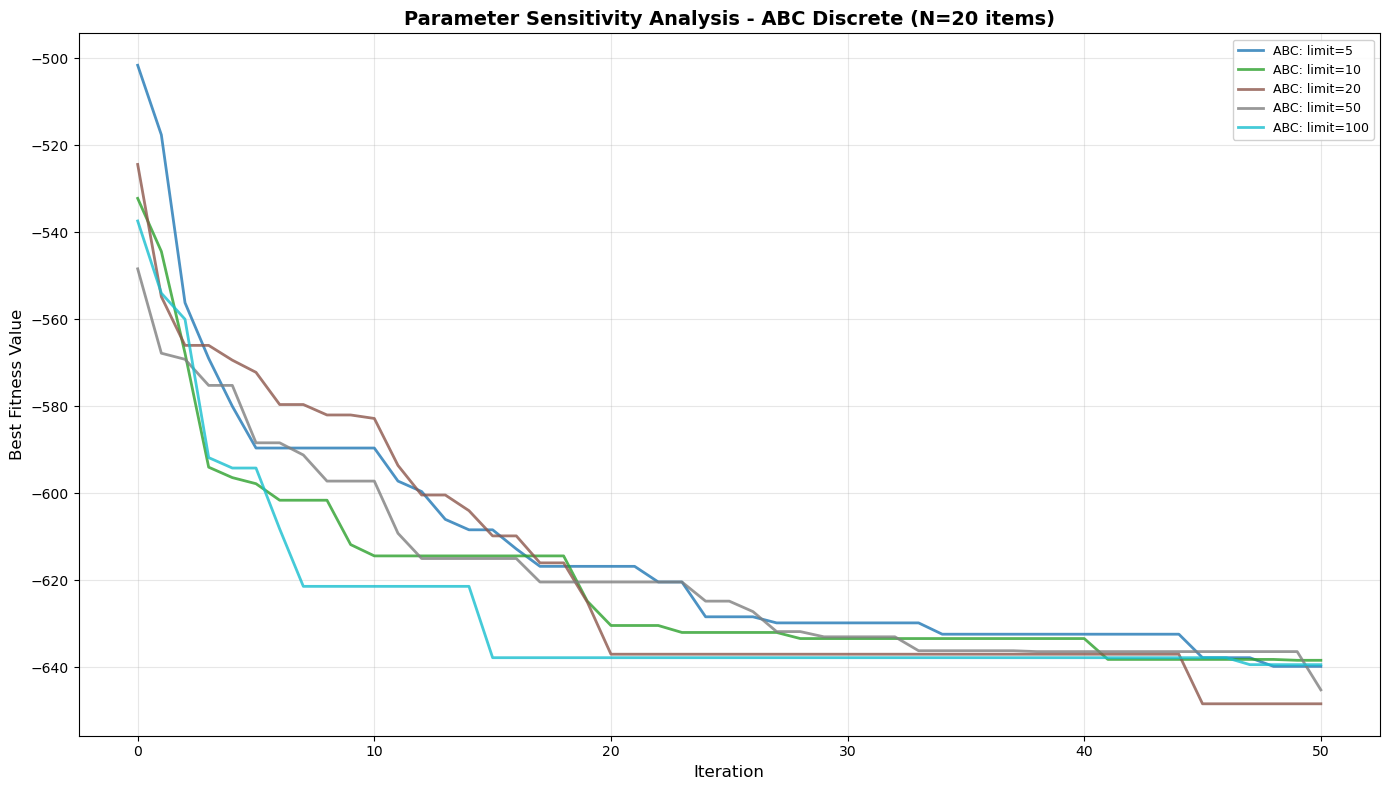


✓ Plotted 5 convergence curves
💡 Compare curves to identify best parameter configuration!
💡 Note: Lower fitness (more negative) = better solution (higher total value)


In [5]:
# Create color scheme for different configurations
colors = plt.cm.tab10(np.linspace(0, 1, len(all_histories)))

# Plot all convergence curves
fig, ax = plt.subplots(figsize=(14, 8))

for idx, (label, history) in enumerate(all_histories.items()):
    ax.plot(history, linewidth=2, color=colors[idx], label=label, alpha=0.8)

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Best Fitness Value', fontsize=12)
ax.set_title(f'Parameter Sensitivity Analysis - {ALGORITHM_NAME} Discrete (N={N_ITEMS} items)', 
            fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3)
# Linear scale for Knapsack (fitness can be negative)
# Note: Lower fitness is better (minimization), but Knapsack uses negative fitness
# So more negative = better (higher total value)

plt.tight_layout()
plt.show()

print(f"\n✓ Plotted {len(all_histories)} convergence curves")
print("💡 Compare curves to identify best parameter configuration!")
print("💡 Note: Lower fitness (more negative) = better solution (higher total value)")
